In [ ]:
#pip install lmfit

In [ ]:
'''import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from pandas import DataFrame as df
import fnmatch
import os
import csv
from lmfit import Model
import sympy as sym
import scipy.optimize as opt
from datetime import datetime
from IPython.display import Latex
from lmfit.models import LorentzianModel
from lmfit.models import GaussianModel
from lmfit import Model, Parameters, minimize, fit_report
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.stats import norm,cauchy,lognorm
import array as arr
from scipy import stats as st
from matplotlib import cm'''

'import numpy as np\nimport scipy as sp\nimport matplotlib.pyplot as plt\nimport matplotlib as mpl\nimport pandas as pd\nfrom pandas import DataFrame as df\nimport fnmatch\nimport os\nimport csv\nfrom lmfit import Model\nimport sympy as sym\nimport scipy.optimize as opt\nfrom datetime import datetime\nfrom IPython.display import Latex\nfrom lmfit.models import LorentzianModel\nfrom lmfit.models import GaussianModel\nfrom lmfit import Model, Parameters, minimize, fit_report\nimport seaborn as sns\nfrom scipy.optimize import curve_fit\nfrom scipy.stats import norm,cauchy,lognorm\nimport array as arr\nfrom scipy import stats as st\nfrom matplotlib import cm'

In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [ ]:
'''from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import PairwiseKernel
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn import preprocessing

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from collections import Counter

from numpy.random import seed
from numpy.random import randn'''

"from sklearn.gaussian_process.kernels import RBF\nfrom sklearn.gaussian_process.kernels import DotProduct\nfrom sklearn.gaussian_process.kernels import WhiteKernel\nfrom sklearn.gaussian_process.kernels import PairwiseKernel\nfrom sklearn.gaussian_process.kernels import RationalQuadratic\nfrom sklearn.gaussian_process.kernels import ExpSineSquared\nfrom sklearn import preprocessing\n\nfrom sklearn.model_selection import KFold\nfrom sklearn.metrics import mean_squared_error\nimport warnings\nwarnings.simplefilter(action='ignore', category=FutureWarning)\n\nfrom collections import Counter\n\nfrom numpy.random import seed\nfrom numpy.random import randn"

In [ ]:
#DEFINING WILLINGALE MODEL
def Willingale_if(t, F_a, alpha, T_a):
    if t<T_a:
        return F_a * np.exp(alpha - (t*alpha)/T_a)
    else:
        return F_a * np.power((t / T_a),(-alpha))

def Willingale(t, F_a, alpha, T_a):
    y = np.zeros(t.shape)
    for j in range(len(y)):
        y[j]=Willingale_if(t[j], F_a, alpha, T_a)
    return y

def log_Willingale_if(logt, logFa, alpha, logTa):
    if logt<logTa:
        return logFa + np.log10(np.e) * alpha * (1.0 - 10**logt/(10**logTa))
    else:
        return logFa - alpha * (logt - logTa)

def log_Willingale(logt, logFa, alpha, logTa):
    y = np.zeros(logt.shape)
    for j in range(len(y)):
        y[j]=log_Willingale_if(logt[j], logFa, alpha, logTa)
    return y

#DEFINING CAUCHY LORENTZIAN FUNCTION
def Cauchy_Lorentz(x, x_0, gamma):
    return ( 1 / (np.pi * gamma * (1 + ( (x-x_0) / gamma )**2 )))


/content/drive/MyDrive/GRB15/GRB150530A_trimmed.csv

/content/drive/MyDrive/GRB15/GRB150607A_trimmed.csv

In [ ]:
#/content/drive/MyDrive/GRB15/GRB150615A_trimmed.csv

In [ ]:
#/content/drive/MyDrive/GRB15/GRB150626B_trimmed.csv

In [ ]:
#/content/drive/MyDrive/GRB15/GRB150711A_trimmed.csv

/content/drive/MyDrive/GRB15/GRB150801B_trimmed.csv

/content/drive/MyDrive/GRB15/GRB150817A_trimmed.csv

/content/drive/MyDrive/GRB15/GRB150821A_trimmed.csv

/content/drive/MyDrive/GRB15/GRB150910A_trimmed.csv

/content/drive/MyDrive/GRB15/GRB150911A_trimmed.csv

/content/drive/MyDrive/GRB15/GRB151001A_trimmed.csv

/content/drive/MyDrive/GRB15/GRB151021A_trimmed.csv

/content/drive/MyDrive/GRB15/GRB151027A_trimmed.csv

GRB150711A


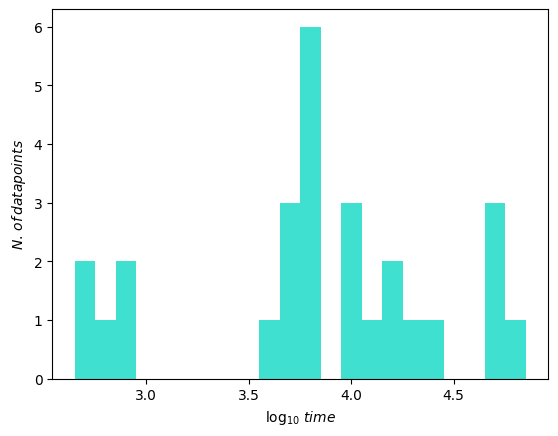

<Figure size 640x480 with 0 Axes>

In [ ]:
header_names=['t', 'pos_t_err', 'neg_t_err', 'flux', 'pos_flux_err', 'neg_flux_err']

GRB_Name="GRB150711A"

GRB_parameters = pd.read_csv("545_GRBs_parameters.csv", header=0, index_col=0)

trimmed_data = pd.read_csv("/content/drive/MyDrive/GRB15/"+GRB_Name+"_trimmed.csv", verbose=False, skiprows=1, skip_blank_lines=True, sep=',', dtype=float, header=None, names=header_names)

#GRB_new = pd.read_csv("/content/drive/MyDrive/Astro/LC Reconstruction 2/GRB_segregated_new.csv", header=0)

GRBIDs_arr = GRB_parameters.index[:] #GRB_new.iloc[:,0]

#ARRAY TO STORE GRB NAMES
Names=[]



#print(GRBIDs_arr.head())
#for i in range(528,len(GRBIDs_arr)):

    #ARRAYS TO STORE VALUES OF ORIGINAL WILLINGALE PARAMETERS FOR ALL GRBs IN THE LOOP

print(GRB_Name)
#cleaned_data = pd.read_csv("C:/Users/biagi/Desktop/GRB-SFR/LCR/All_GRBs_reconstruction/LC Reconstruction 2/GRBs_cleaned/"+GRB_Name+"_cleaned.csv", verbose=False, skiprows=2, skip_blank_lines=True, sep=',', dtype=float, header=None, names=header_names, na_filter=True)
#CLEANED DATA CONTAINS FLUX VS TIME DATA OF PROMPT AS WELL AS AFTERGLOW REGION (COMPLETE LC.). PLEASE REFER TO THE DESCRIPTION AT THE BEGINNING.
#TRIMMED DATA CONTAINS FLUX VS TIME DATA OF AFTERGLOW REGION.

#DEFINING DENSITY FACTOR
density_factor = 1

#Here we obtain the fitting parameters.

#Ta is in log scale. Fa in log scale. Alpha is linear scale.
#And tt and tfinal in log scale.
log_T_a = GRB_parameters.loc[GRB_Name, "logTa_best"]
log_T_a_min = GRB_parameters.loc[GRB_Name, "logTa_min"]
log_T_a_max = GRB_parameters.loc[GRB_Name, "logTa_max"]

log_F_a = GRB_parameters.loc[GRB_Name, "logFa"]
log_F_a_min = GRB_parameters.loc[GRB_Name, "logFa_min"]
log_F_a_max = GRB_parameters.loc[GRB_Name, "logFa_max"]

alpha = GRB_parameters.loc[GRB_Name, "alpha_best"]
alpha_min = GRB_parameters.loc[GRB_Name, "alpha_min"]
alpha_max = GRB_parameters.loc[GRB_Name, "alpha_max"]

log_Tt = GRB_parameters.loc[GRB_Name, "logTt"]
#log_Tfinal = GRB_parameters.loc[GRB_Name, "logTfinal"]


#FETCHING MAXIMUM AND MINIMUM VALUE OF FLUXES AND TIME VALUES FROM TRIMMED DATA
#THESE VALUES ARE IN LINEAR SCALE
max_fluxes = np.max(trimmed_data["flux"])
min_fluxes = np.min(trimmed_data["flux"])

max_ts = np.max(trimmed_data["t"])
min_ts = np.min(trimmed_data["t"])


#ABOVE VALUES IN LOG SCALE
log_max_fluxes = np.log10(max_fluxes)
log_min_fluxes = np.log10(min_fluxes)

log_max_ts = np.log10(max_ts)
log_min_ts = np.log10(min_ts)

#DEFINING THE ERROR VALUES FROM DATA FILE IN LINEAR SCALE

#for time
positive_ts_err = trimmed_data["pos_t_err"]
negative_ts_err = trimmed_data["neg_t_err"]

#for flux
positive_fluxes_err = trimmed_data["pos_flux_err"]
negative_fluxes_err = trimmed_data["neg_flux_err"]


#READING TIME AND FLUXES FROM THE TRIMMED DATA
#THESE VALUES ARE IN LINEAR SCALE
ts, fluxes = trimmed_data["t"].to_numpy(), trimmed_data["flux"].to_numpy()

#ABOVE VALUES IN LOG SCALE
log_ts, log_fluxes = np.log10(ts), np.log10(fluxes)


# ERROR ON THE FLUXES
pos_fluxes= fluxes + positive_fluxes_err
neg_fluxes= fluxes + negative_fluxes_err


# GENERATES TIME VALUES AT EQUAL INTERVALS IN RANGE OF TS IN LINEAR SCALE
# THIS IS TO BE USED FOR GENERATING THE TIMES AT WHICH WE RECONSTRUCT THE LC
# IT IS EQUAL TO THE NUMBER OF DATA POINTS AS THE ORIGINAL LIGHT CURVE
recon_t = np.geomspace(np.min(ts), np.max(ts), density_factor*len(ts))

#ABOVE VALUE IN LOG SCALE
log_recon_t = np.log10(recon_t)
log_recon_t = log_recon_t.reshape(-1,1)

totdensity=len(log_ts)/(max(log_ts)-min(log_ts))
    # print(totdensity)

n, bins, patches = plt.hist(log_ts, bins=np.arange(min(log_ts), max(log_ts)+0.1, step=0.1), color='turquoise')
nmean=np.mean(n)
nstd=np.std(n)

edges=np.histogram_bin_edges(log_ts, bins='auto')
#print(edges)

# seed random number generator
#print(n)
#print(np.max(n)/2)
# plt.hist(log_ts, bins=np.arange(min(log_ts), max(log_ts)+0.1, step=0.1), color='turquoise')
plt.xlabel("$\log_{10}\,time$")
plt.ylabel("$N.\,of\,datapoints$")
plt.show()
plt.clf()

gapslist=[]

for ff in range(0,len(log_ts)-1):
    lowbound=log_ts[ff]
    upbound=log_ts[ff+1]

    if np.abs(upbound-lowbound)>=0.03: #np.min(totalgaps): #0.10:

        gapslist.append([lowbound,upbound,np.abs(upbound-lowbound)])

pivotkeep=[]
for ii in range(len(log_recon_t)):
    for jj in range(len(gapslist)):
        if gapslist[jj][0]<=log_recon_t[ii]<=gapslist[jj][1]:
            pivotkeep.append(ii)

#print(pivotkeep)

logtimekeep=[[log_recon_t[f][0]] for f in pivotkeep]

logtimekeeparray=np.array(logtimekeep)

#print(type(log_recon_t))
#print(type(logtimekeeparray))

log_recon_t = logtimekeeparray

#CALCULATING ERRORBAR IN LINEAR SCALE
ts_error = (positive_ts_err - negative_ts_err )/2
fluxes_error = (positive_fluxes_err - negative_fluxes_err)/2

#CALCULATING ERRORBAR IN LOG SCALE

pos_log_fluxes = np.log10(pos_fluxes)
neg_log_fluxes = np.log10(neg_fluxes)

#ERROR PARAMETERS (LOG)
log_F_a_err = (float(log_F_a_max) - float(log_F_a_min))/2
log_T_a_err= (float(log_T_a_max) - float(log_T_a_min))/2
alpha_err = (float(alpha_max) - float(alpha_min))/2

#CALLING LOG WILLINGALE FUNCTION ON LOG PARAMETER
log_Willingale_line = log_Willingale(log_recon_t, log_F_a, alpha, log_T_a)

#RESIDUALS IN LOG SCALE
log_Willingale_line = log_Willingale(log_ts, log_F_a, alpha, log_T_a)
#log_Willingale_min = log_Willingale(log_ts, log_F_a_min, alpha_min, log_T_a_min)  #THESE COMMENTED LINES CALCULATE THE MINIMUM AND MAXIMUM WILLINGALE FIT.
#log_Willingale_max = log_Willingale(log_ts, log_F_a_max, alpha_max, log_T_a_max)

log_residuals = log_fluxes-log_Willingale_line

#FITTING THE LOG RESIDUAL HISTOGRAM WITH GAUSSIAN DISTRIBUTION

parameters = st.norm.fit(log_residuals, floc=0)
#print("The parameters of the fit are: "+ str(parameters))
fitted_dist = st.norm(scale=parameters[1])

st.kstest(log_residuals, fitted_dist.cdf)

log_Willingale_line = log_Willingale(log_recon_t, log_F_a, alpha, log_T_a)


In [ ]:
# Symmetric Log Scale Transformation
def symmetric_log_scale(flux_values, a):
    return np.log(np.abs(flux_values / a)) * np.sign(flux_values)

a = fluxes.min()  #minimum value of flux

#prepare data
symlog_flux = symmetric_log_scale(fluxes, a)
log_ts = np.log10(ts)

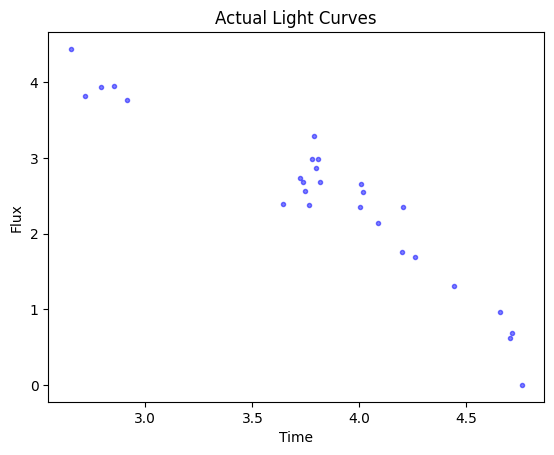

In [ ]:
plt.plot(log_ts,symlog_flux, 'b.', alpha=0.5)

plt.xlabel('Time')
plt.ylabel('Flux')
plt.title(f'Actual Light Curves')
plt.show()

In [ ]:
upsampled_times = []
upsampled_fluxes = []

for i in range(len(log_ts) - 1):
    start_time = log_ts[i]
    end_time = log_ts[i + 1]
    gap = end_time - start_time

    # Check if the gap exceeds the threshold
    if gap > 0.2:
        # Generate new times between start and end (excluding boundaries)
        new_times = np.linspace(start_time, end_time, num=10)[1:-1]  # Adjust `num` as needed
        upsampled_times.extend(new_times)

# Convert to a numpy array for further processing
upsampled_times = np.array(upsampled_times)


In [ ]:
from scipy.interpolate import interp1d

interpolation_function=interp1d(log_ts, symlog_flux, kind='linear', fill_value="extrapolate")
fluxes_imputed=interpolation_function(upsampled_times)

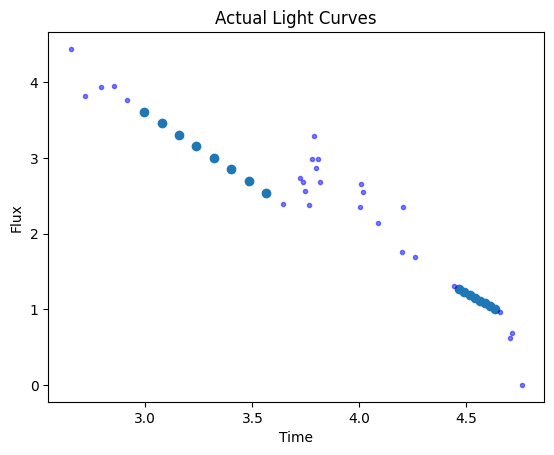

In [ ]:
plt.plot(log_ts,symlog_flux, 'b.', alpha=0.5)
plt.scatter(upsampled_times,fluxes_imputed)

plt.xlabel('Time')
plt.ylabel('Flux')
plt.title(f'Actual Light Curves')
plt.show()

In [ ]:
# Join the arrays
all_times = np.concatenate([log_ts, upsampled_times])
all_fluxes = np.concatenate([symlog_flux, fluxes_imputed])

sorted_indices = np.argsort(all_times)
all_times = all_times[sorted_indices]
all_fluxes = all_fluxes[sorted_indices]


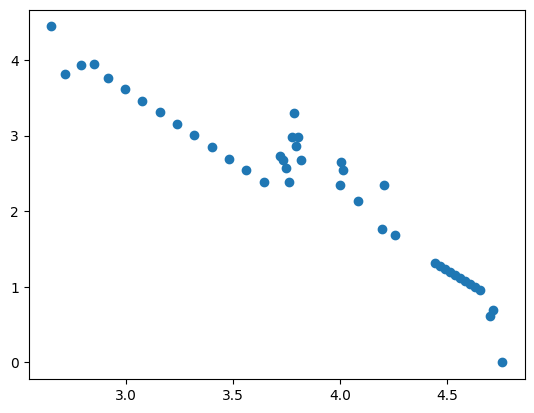

In [ ]:
plt.scatter(all_times,all_fluxes)

In [ ]:
#dividing data into training and validation

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(all_times.reshape(-1,1), all_fluxes.reshape(-1,1), test_size=0.3, random_state=42)


print(f"Training data size: {len(X_train)}")
print(f"Validation data size: {len(X_val)}")

Training data size: 30
Validation data size: 13


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel,ConstantKernel as C, Matern
from sklearn.ensemble import RandomForestRegressor



In [ ]:
kernel = 1.0 * RBF(length_scale=1e1, length_scale_bounds=(1e-2, 1e3)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-5, 1e1))

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [ ]:
# Fit GP with best kernel
gp = GaussianProcessRegressor(kernel=kernel, random_state=42, n_restarts_optimizer=5)
gp.fit(X_train, y_train)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=5, random_state=42)

In [ ]:
# Get GP predictions
y_train_gp = gp.predict(X_train).reshape(-1, 1)
y_val_gp = gp.predict(X_val).reshape(-1, 1)

# Calculate residuals
residuals_train = y_train - y_train_gp
residuals_val = y_val - y_val_gp

In [ ]:
# Fine-tune Random Forest with GridSearchCV
param_dist = {
    'n_estimators': [100, 102],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


# Use RandomizedSearchCV instead of GridSearchCV
rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=2,  # Number of parameter settings sampled
    cv=3,       # Reduced number of cross-validation folds
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=1
)

In [ ]:
random_search.fit(X_train, residuals_train)

# Get best RF model
best_rf = random_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
# Get RF predictions for training and validation
y_train_rf = best_rf.predict(X_train).reshape(-1, 1)
y_val_rf = best_rf.predict(X_val).reshape(-1, 1)


In [ ]:

# Final predictions (GP base + RF residual correction)
y_train_final = y_train_gp + y_train_rf
y_val_final = y_val_gp + y_val_rf



In [ ]:
# Predict on reconstruction points
log_recon_seq = log_recon_t.reshape(-1, 1)
print(f"log_recon_seq shape: {log_recon_seq.shape}")
rf_pred = best_rf.predict(log_recon_seq).reshape(-1, 1)
gp_pred = gp.predict(log_recon_seq).reshape(-1, 1)
recon_pred = gp_pred + rf_pred


log_recon_seq shape: (26, 1)


In [ ]:
def inverse_symmetric_log(y, a):
    return a * (np.exp(y)) * np.sign(y)

In [ ]:
# Convert back to original scale
predicted_flux = inverse_symmetric_log(recon_pred, a)
recon_fluxes_up = np.log10(predicted_flux)

In [ ]:

#CALCULATING TIME ERROR IN LINEAR SCALE
ts_error = (positive_ts_err - negative_ts_err)/2

#CALCULATING TIME ERROR IN LOG SCALE
log_ts_error = ts_error/(ts*np.log(10))

errparameters = st.norm.fit(log_ts_error) #GAUSSIAN FITTING ON TIME ERROR DISTRIBUTION
err_dist_time = st.norm(loc=errparameters[0], scale=errparameters[1])

recon_logtimeerr=err_dist_time.rvs(size=len(log_recon_t)) # len(log_ts_error)


In [ ]:
#adding noise
fluxes_error = (positive_fluxes_err - negative_fluxes_err)/2
logfluxerrs = fluxes_error/(fluxes*np.log(10))

errparameters = st.norm.fit(logfluxerrs) #GAUSSIAN FITTING ON ERROR-BAR DISTRIBUTION
err_dist = st.norm(loc=errparameters[0], scale=errparameters[1])

recon_errorbar=err_dist.rvs(size=len(log_recon_t))

#Point specific noise
point_specific_noise = []
for j in range(len(recon_fluxes_up)):
    fitted_dist = st.norm(loc=recon_fluxes_up[j], scale=recon_errorbar[j])
    point_noise = fitted_dist.rvs() - recon_fluxes_up[j]
    point_specific_noise.append(point_noise)
point_specific_noise = np.array(point_specific_noise)

#Jiggle reconstructed points
jiggled_points = recon_fluxes_up + point_specific_noise

In [ ]:
# Generate multiple realizations with noise
num_samples = 100
jiggled_realizations = []

for _ in range(num_samples):
    point_specific_noise = []
    for j in range(len(recon_fluxes_up)):
        fitted_dist = norm(loc=recon_fluxes_up[j], scale=recon_errorbar[j])
        point_noise = fitted_dist.rvs() - recon_fluxes_up[j]
        point_specific_noise.append(point_noise)
    jiggled_realizations.append(recon_fluxes_up + np.array(point_specific_noise))

jiggled_realizations = np.array(jiggled_realizations)

# Calculate statistics
mean_jiggled = np.mean(jiggled_realizations, axis=0)
ci_95_lower = np.percentile(jiggled_realizations, 2.5, axis=0)
ci_95_upper = np.percentile(jiggled_realizations, 97.5, axis=0)

CSV saved successfully at: /content/drive/MyDrive/INTERN GRB15/csv files/GRB150711A_tuned.csv


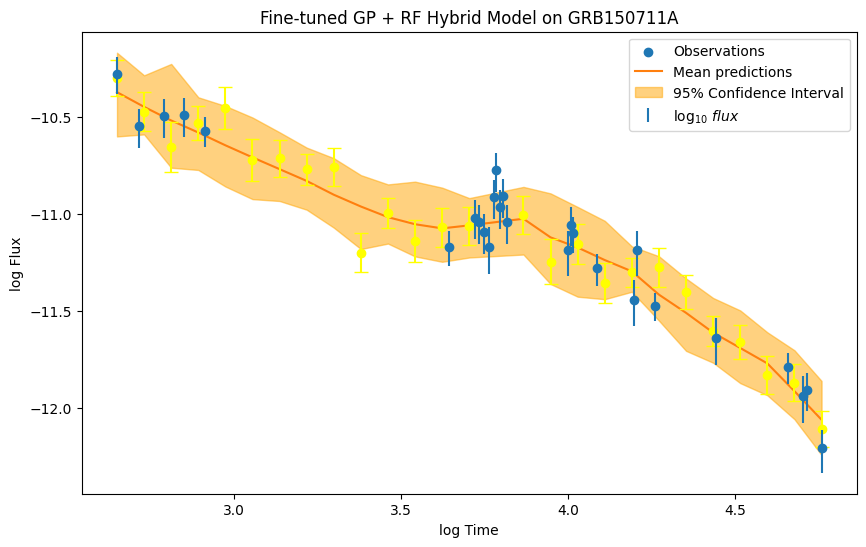

Plot saved successfully at: /content/drive/MyDrive/INTERN GRB15/plots/GRB150711A_plot.png


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define save directories
csv_save_dir = "/content/drive/MyDrive/INTERN GRB15/csv files"
plot_save_dir = "/content/drive/MyDrive/INTERN GRB15/plots"

# Ensure directories exist
os.makedirs(csv_save_dir, exist_ok=True)
os.makedirs(plot_save_dir, exist_ok=True)

# Copy dataframe
df = trimmed_data.copy(deep=True)

# Iterate and append new rows
for k in range(len(log_recon_t)):
    new_row = {
        "t": 10**log_recon_t[k],
        "pos_t_err": 10**recon_logtimeerr[k],
        "neg_t_err": 10**recon_logtimeerr[k],
        "flux": 10**jiggled_points[k],
        "pos_flux_err": 10**jiggled_points[k] * np.log(10) * recon_errorbar[k],
        "neg_flux_err": 10**jiggled_points[k] * np.log(10) * recon_errorbar[k]
    }

    # Convert new row to DataFrame and append
    df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

# Save as CSV
csv_path = os.path.join(csv_save_dir, f"{GRB_Name}_tuned.csv")
df.to_csv(csv_path, index=False)

print(f"CSV saved successfully at: {csv_path}")

# -------------------- PLOTTING --------------------

# Flatten arrays for plotting
ci_95_lower = ci_95_lower.flatten()
ci_95_upper = ci_95_upper.flatten()
log_recon_t = log_recon_t.flatten()
jiggled_points = (recon_fluxes_up + point_specific_noise).flatten()

# Create final plot
plt.figure(figsize=(10, 6))
plt.errorbar(log_ts, log_fluxes,
            yerr=[log_fluxes - neg_log_fluxes, pos_log_fluxes - log_fluxes],
            label=r"$\log_{10}\,flux$", linestyle="", zorder=4)
plt.errorbar(log_recon_t, jiggled_points,
            linestyle='none', yerr=np.abs(recon_errorbar),
            marker='o', capsize=5, color='yellow', zorder=3)

plt.scatter(log_ts, log_fluxes, label='Observations', zorder=5)
plt.plot(log_recon_t, recon_fluxes_up, label='Mean predictions', zorder=2)
plt.fill_between(log_recon_t, ci_95_lower, ci_95_upper,
                color='orange', alpha=0.5,
                label='95% Confidence Interval', zorder=1)

plt.xlabel('log Time')
plt.ylabel('log Flux')
plt.title(f'Fine-tuned GP + RF Hybrid Model on {GRB_Name}')
plt.legend()

# Save the plot
plot_path = os.path.join(plot_save_dir, f"{GRB_Name}_plot.png")
plt.savefig(plot_path, dpi=300)
plt.show()

print(f"Plot saved successfully at: {plot_path}")
